<a href="https://colab.research.google.com/github/IrynaBarnych/AI6/blob/hw/module3/%D0%94%D0%97_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("https://raw.githubusercontent.com/HalyshAnton/IT-Step-Pyton-AI/main/module3/data/diamonds.csv", index_col='Unnamed: 0')

In [5]:
df.head()

,carat,price
0,0.23,326
1,0.21,326
2,0.23,327
3,0.29,334
4,0.31,335


# Завдання 1
Очистіть дані від викидів, виведіть основні числові характеристики та намалюйте точкову діаграму

In [6]:
df.describe()

,carat,price
count,53940.000000,53940.000000
mean,0.797940,3932.799722
std,0.474011,3989.439738
min,0.200000,326.000000
25%,0.400000,950.000000
50%,0.700000,2401.000000
75%,1.040000,5324.250000
max,5.010000,18823.000000


In [7]:
def remove_outliers(df, column_name):
  column = df[column_name]

  q1 = column.quantile(q=0.25)
  q3 = column.quantile(q=0.75)

  iqr = q3 - q1

  lower = q1 - 1.5*iqr
  upper = q3 + 1.5*iqr

  mask = (column >= lower) & (column <= upper)

  return df[mask]

for column_name in df.columns:
  if df.dtypes[column_name] in ("object", "datetime64[ns]"):
    continue

  df = remove_outliers(df, column_name)

In [8]:
df.shape

(49516, 2)

In [9]:
df.dropna(inplace=True)
df

,carat,price
0,0.23,326
1,0.21,326
2,0.23,327
3,0.29,334
4,0.31,335
...,...,...
53935,0.72,2757
53936,0.72,2757
53937,0.70,2757
53938,0.86,2757


<Axes: xlabel='carat', ylabel='price'>

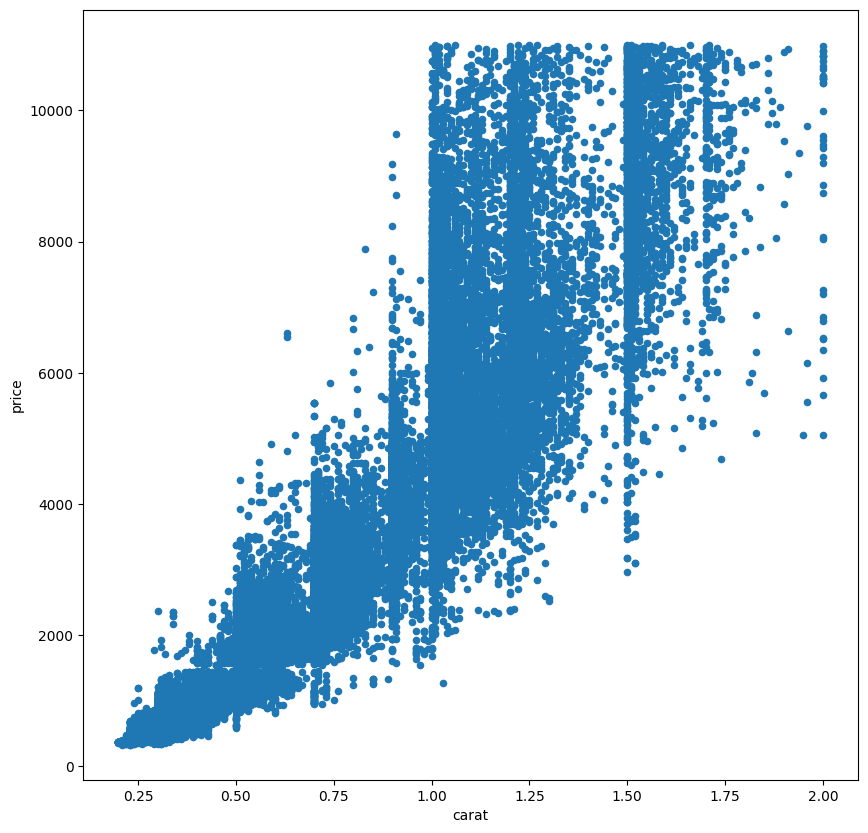

In [10]:
df.plot(kind='scatter', x='carat', y='price', figsize=(10,10))

# Завдання 2
Розділіть дані на залежну y та незалежну X ознаки. Розділіть дані на тренувальну та тестову частини

In [11]:
df.dropna(inplace=True)
df

,carat,price
0,0.23,326
1,0.21,326
2,0.23,327
3,0.29,334
4,0.31,335
...,...,...
53935,0.72,2757
53936,0.72,2757
53937,0.70,2757
53938,0.86,2757


In [13]:
y = df["carat"]
X = df.drop(columns=["carat"])

In [14]:
X = pd.get_dummies(X)
X

,price
0,326
1,326
2,327
3,334
4,335
...,...
53935,2757
53936,2757
53937,2757
53938,2757


# Завдання 3
Натренуйте модель та виведіть такі метрики: MAE, RMSE, R2

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    train_size=0.8,
                                                    random_state=42)

In [25]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X_train, y_train)

LinearRegression()

In [26]:
from sklearn import metrics

def get_metrics(y_true, y_pred, name="model"):
  df = pd.DataFrame()

  df.loc["MAE", name] = metrics.mean_absolute_error(y_true, y_pred)
  df.loc["MSE", name] = metrics.mean_squared_error(y_true, y_pred)
  df.loc["RMSE", name] = metrics.mean_squared_error(y_true, y_pred) ** 0.5
  df.loc["R2", name] = metrics.r2_score(y_true, y_pred)

  return df.round(2)

In [27]:
all_metrics = pd.DataFrame()

In [28]:
all_metrics["train"] = get_metrics(y_train, model.predict(X_train))
all_metrics["test"] = get_metrics(y_test, y_pred)

In [29]:
all_metrics

,train,test
MAE,0.10,0.11
MSE,0.02,0.02
RMSE,0.14,0.14
R2,0.85,0.85


# Завдання 4
Напишіть рівняння регресії за прикладом:
Бал_літній = 1.02*Бал_зимовий -15.6

In [34]:
carat_train = 0.29
price_train = 0.10
carat_test = 0.31
price_test = 0.11

a = (price_test - price_train) / (carat_test - carat_train)

b = price_train - a * carat_train

print(f"Рівняння регресії: Ціна = {a}*Карат + {b}")


Рівняння регресії: Ціна = 0.49999999999999933*Карат + -0.04499999999999979


# Завдання 5 (оптимально)
Додайте в таблицю новий стовпчик carat**2. Знову натренуйте модель та напишіть рівняння регресії. Порівняйте дві моделі за метриками